In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/Explo/train.csv", header=0, names=['Tweets','Label'])
df = df[df['Tweets'].notnull()]

In [ ]:
df.head()

,Tweets,Label
0,मुम्बई डोंगरी रास्ते नमाज़ पढ़कर कोरोना भगाते ...,1
1,कोरोना हराना हैलॉक डाउन क्यों ज़रूरी केजीएमयू ...,1
2,सब समझते समझ सब काम कीया कोरोना वायरस जैविक बम...,1
3,कोरोना वायरस युद्ध बड़ा संकट मानकर पूरी क्षमता...,1
4,“ अप्रेल मोदी जी बजे मिनट दीपक जलाने संदेश दीप...,1


In [ ]:
hindi_tweets = df['Tweets'].tolist()

In [ ]:
hindi_tweets[0]

'मुम्बई डोंगरी रास्ते नमाज़ पढ़कर कोरोना भगाते देश संसाधनों पहला हक़ रखने विशेष प्रजाति लोग'

In [ ]:
def tokenize(data):
    result = [line.split() for line in data]
    return result

In [ ]:
processedcorpus = tokenize(hindi_tweets)
processedcorpus[0]

['मुम्बई',
 'डोंगरी',
 'रास्ते',
 'नमाज़',
 'पढ़कर',
 'कोरोना',
 'भगाते',
 'देश',
 'संसाधनों',
 'पहला',
 'हक़',
 'रखने',
 'विशेष',
 'प्रजाति',
 'लोग']

In [ ]:
dictionary = corpora.Dictionary(processedcorpus)

In [ ]:
dictionary.filter_extremes()

In [ ]:
print(dictionary.token2id)

{'देश': 0, 'नमाज़': 1, 'पहला': 2, 'रखने': 3, 'रास्ते': 4, 'लोग': 5, 'विशेष': 6, 'संसाधनों': 7, 'COVID': 8, 'क्यों': 9, 'टीम': 10, 'डाउन': 11, 'डॉक्टर': 12, 'निवासी': 13, 'लखनऊ': 14, 'शामिल': 15, 'हराना': 16, 'काम': 17, 'बम': 18, 'युद्ध': 19, 'वायरस': 20, 'सब': 21, 'समझ': 22, 'हमला': 23, 'पूरी': 24, 'बड़ा': 25, 'मुख्यमंत्री': 26, 'राज्य': 27, 'श्री': 28, 'संकट': 29, 'अप्रेल': 30, 'जलाएं': 31, 'जलाने': 32, 'जी': 33, 'ताकि': 34, 'दीपक': 35, 'परमात्मा': 36, 'बजे': 37, 'मिनट': 38, 'मोदी': 39, 'संदेश': 40, 'हम': 41, 'अलग': 42, 'जहां': 43, 'मस्जिद': 44, 'मेरठ': 45, 'योगी': 46, 'रखा': 47, 'संदिग्ध': 48, 'सिस्टम': 49, 'जलने': 50, 'जले': 51, 'लगा': 52, 'आज': 53, 'कार्यक्रम': 54, 'देखिए': 55, 'शाम': 56, 'हिंदुस्तान': 57, 'https': 58, 'क्षेत्र': 59, 'चर्चा': 60, 'प्रयागराज': 61, 'बैठक': 62, 'कुदरती': 63, 'कोढ़': 64, 'कौम': 65, 'खाज': 66, 'खुजली': 67, 'ज़ाहिल': 68, 'दाद': 69, 'बहता': 70, 'मवाद': 71, 'मैं': 72, 'मौलाना': 73, 'साद': 74, 'हाँ': 75, 'हूँ': 76, 'आरक्षण': 77, 'कब': 78, 'खिलाफ': 79, 'लड़न

In [ ]:
bow_corpus = [dictionary.doc2bow(line) for line in processedcorpus]

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=70, id2word = dictionary, passes=50, alpha=0.694)

In [ ]:
import numpy as np

from gensim.models import CoherenceModel

def get_topics(lda_model, num_topics):
    topics_matrix = lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=20)
    topics_matrix = np.array(topics_matrix)

    topic_words = topics_matrix[:,1]
    count = 0
    for i in topic_words:
        print('Topic {%d}:' % count),
        print(" ".join([str(word[0]) for word in i]))
        count += 1
        print()    
def evaluate_topic_model(lda_model, corpus, dictionary, text):
    # Compute Perplexity
    print('Perplexity: ', lda_model.log_perplexity(corpus)) 
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=dictionary, coherence='c_v')
    print ("Pipeline parameters for C_V coherence")
    print (coherence_model_lda)
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)

In [ ]:
get_topics(ldamodel, 72)

evaluate_topic_model(ldamodel, bow_corpus, dictionary, processedcorpus)

Topic {0}:
बजे रात मिनट अप्रैल बंद आह्वान भाग करके रात्रि बालकनी लाइटें सारी नरेन्द्र मैंने जलाएँ आज सहित टॉर्च कहने तरफ़

Topic {1}:
नही लड़ने आगे देखो पीछे होगी योगदान आशा दिवाली चले उपलब्ध अमीर राजनीति बढ़कर आस्था मृत्योर्मामृतं सिर्फ़ तबलीग कर्तव्य देश

Topic {2}:
मैं हूँ मौलाना साद हाँ कौम कोढ़ दाद मवाद बहता खाज कुदरती ज़ाहिल उनसे लड़ना तोड़ सात Nahi स् विचारधारा

Topic {3}:
वायरस वजह कोष विदेशी बताया विधायक फैलाया रोक सचिव जरूरतमंदों हमले भागे स्वास्थ्यकर्मी आइये पुष्टि अंधेरे हरि देशभर सूरत मामला

Topic {4}:
संक्रमित दिए जमाती समाज मंत्रालय शुरू ढूंढ Request बैठक विभिन्न India खाने जाये मरीजो सांसदों नई आगरा बलात्कार भेजे सिखा

Topic {5}:
डॉक्टर टीम सुरक्षा मेडिकल खत्म लगे करे इससे हराने अस्पतालों प्रधान नर्स वा महाराज बजाय पतंजलि मुश्किल जलाये समान कानून

Topic {6}:
गई स्वास्थ्य घरों कल पालन भगवान लगता बाबा सवाल सुबह इनकी बच हार नफरत अरे पहचान कर्मियों श्राप आंकड़े भेजा

Topic {7}:
दीया दीप आओ मिलकर जलाएं मेरे वाइरस स जयपुर सके गुजरात जिम्मेदारी रुपये उपचार समुदाय अगले जिसके धर

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, alpha=0.694)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

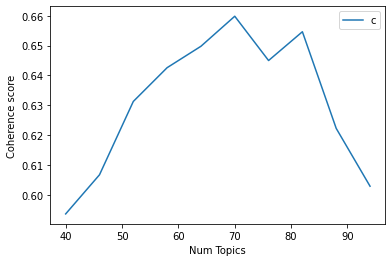

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processedcorpus, start=40, limit=100, step=6)

import matplotlib.pyplot as plt
limit=100; start=40; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
ldamodel.get_document_topics([(1, 1), (15, 2), (17, 1), (44, 1), (72, 1)], minimum_probability=0.0)

[(0, 0.01271528),
 (1, 0.01271528),
 (2, 0.031037008),
 (3, 0.01271528),
 (4, 0.01271528),
 (5, 0.01271528),
 (6, 0.01271528),
 (7, 0.01271528),
 (8, 0.01271528),
 (9, 0.031037008),
 (10, 0.01271528),
 (11, 0.01271528),
 (12, 0.01271528),
 (13, 0.01271528),
 (14, 0.01271528),
 (15, 0.01271528),
 (16, 0.01271528),
 (17, 0.01271528),
 (18, 0.01271528),
 (19, 0.01271528),
 (20, 0.01271528),
 (21, 0.01271528),
 (22, 0.01271528),
 (23, 0.01271528),
 (24, 0.01271528),
 (25, 0.01271528),
 (26, 0.01271528),
 (27, 0.01271528),
 (28, 0.01271528),
 (29, 0.049358733),
 (30, 0.01271528),
 (31, 0.01271528),
 (32, 0.01271528),
 (33, 0.01271528),
 (34, 0.01271528),
 (35, 0.01271528),
 (36, 0.01271528),
 (37, 0.01271528),
 (38, 0.01271528),
 (39, 0.01271528),
 (40, 0.01271528),
 (41, 0.01271528),
 (42, 0.01271528),
 (43, 0.031037008),
 (44, 0.01271528),
 (45, 0.01271528),
 (46, 0.01271528),
 (47, 0.01271528),
 (48, 0.01271528),
 (49, 0.01271528),
 (50, 0.01271528),
 (51, 0.01271528),
 (52, 0.031037008)

In [ ]:
def texts_to_vec(data):
    data = tokenize(data)
    bow_corpus = [dictionary.doc2bow(line) for line in data]
    X = []

    for el in bow_corpus:
        temp = ldamodel.get_document_topics(el, minimum_probability=0.0)
        temp = list(np.array(temp)[:, 1])
        X.append(temp)
    X = np.array(X)
    
    return X

In [ ]:
import numpy as np

X = []
# df.Label = pd.Categorical(df.Label)
# df['Label'] = df['Label'].cat.codes
Y = df['Label'].tolist()

for el in bow_corpus:
    temp = ldamodel.get_document_topics(el, minimum_probability=0.0)
    temp = list(np.array(temp)[:, 1])
    X.append(temp)
X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((3104, 70), (3104,))

In [ ]:

from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, random_state=45, test_size=0.25)

In [ ]:
import time
df_perf_metrics = pd.DataFrame(columns=['Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision', 'Recall', 'f1_score'])
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score', 'Training Time (secs)'
])

# list to retain the models to use later for test set predictions
models_trained_list = []

def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    # time keeping
    start_time = time.time()
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(Xtrain, Ytrain)
    print("Completed {} model training.".format(model_name))
    elapsed_time = time.time() - start_time
    # Time Elapsed
    print("Time elapsed: {:.2f} s.".format(elapsed_time))
    # Predictions
    y_pred = model.predict(Xval)
    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(Xtrain, Ytrain),
        model.score(Xval, Yval),
        precision_score(Yval, y_pred),
        recall_score(Yval, y_pred),
        f1_score(Yval, y_pred), "{:.2f}".format(elapsed_time)
    ]
    # keep a track of trained models
    models_trained_list.append(model)
    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

models_list = [LogisticRegression(),
               MultinomialNB(),
               MLPClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               GradientBoostingClassifier(),
               AdaBoostClassifier(),
               SVC()
               ]

for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 0.02 s.
Completed LogisticRegression model's performance assessment.
Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.00 s.
Completed MultinomialNB model's performance assessment.
Training MLPClassifier model...
Completed MLPClassifier model training.
Time elapsed: 3.30 s.
Completed MLPClassifier model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 0.13 s.
Completed DecisionTreeClassifier model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 0.82 s.
Completed RandomForestClassifier model's performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 1.42 s.
Completed GradientBoostingClassifier model's performance asse

In [ ]:
#print(df_perf_metrics)
analysis = pd.DataFrame(df_perf_metrics)
analysis.to_csv('analysis.csv')
analysis

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs)
0,LogisticRegression,0.600945,0.610825,0.000000,0.000000,0.000000,0.02
1,MultinomialNB,0.600945,0.610825,0.000000,0.000000,0.000000,0.00
2,MLPClassifier,0.691581,0.666237,0.589958,0.466887,0.521257,3.30
3,DecisionTreeClassifier,0.993986,0.601804,0.489097,0.519868,0.504013,0.13
4,RandomForestClassifier,0.993986,0.628866,0.529167,0.420530,0.468635,0.82
5,GradientBoostingClassifier,0.790808,0.661082,0.589041,0.427152,0.495202,1.42
6,AdaBoostClassifier,0.713058,0.631443,0.532258,0.437086,0.480000,0.35
7,SVC,0.818299,0.662371,0.593458,0.420530,0.492248,0.68


In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


def self_train(Xtrain, Xval, Ytrain, Yval, n_models=5):
    unlabelled_data = np.array(pd.read_csv("drive/MyDrive/Explo/unannotated.csv")["Tweets"])
    final_unlabelled_data = []
    labels = []
    
    # Lets split the unlabelled data into n_models splits.
    splitted_data = []
    each_size = math.ceil(unlabelled_data.shape[0] / n_models)
    for i in range(0, unlabelled_data.shape[0], each_size):
        splitted_data.append(unlabelled_data[i:i+each_size])

    for i in range(n_models+1):

        print(f"Currently training {i+1}th model on training data of shape {Xtrain.shape}")
        base_model = RandomForestClassifier().fit(Xtrain, Ytrain)
        print(f"And it gives a score of {base_model.score(Xval, Yval)} of validation data")

        if splitted_data:
            pure_new_data = splitted_data.pop(0)
            new_data = texts_to_vec(pure_new_data)

            # preds = base_model.predict(new_data)
            preds = base_model.predict_proba(new_data)[:,1]
            print(preds.shape)
            threshold = 0.75
            cleaned_new_data = []
            new_preds = []
            for sentence, text, pred in zip(pure_new_data, new_data, preds) :
                if pred > threshold or pred < 1-threshold :
                    cleaned_new_data.append(text)
                    new_preds.append(round(pred))
                    final_unlabelled_data.append(sentence)
           #print(cleaned_new_data)
            if cleaned_new_data :
                Xtrain = np.append(Xtrain, cleaned_new_data, axis=0)
                Ytrain = np.append(Ytrain, new_preds)
                labels.extend(new_preds)
        
    return final_unlabelled_data, labels

In [ ]:
Yval.tolist().count(0)

474

In [ ]:
Xul, Yul = self_train(Xtrain, Xval, Ytrain, Yval)

self_labelled_data = pd.DataFrame({"Tweets":Xul,
                         "Label":Yul})
self_labelled_data = df.append(self_labelled_data)
self_labelled_data.to_csv("drive/MyDrive/Explo/self_labelled_data.csv", index=None)

Currently training 1th model on training data of shape (2328, 70)
And it gives a score of 0.6211340206185567 of validation data
(801,)
Currently training 2th model on training data of shape (2600, 70)
And it gives a score of 0.6430412371134021 of validation data
(801,)
Currently training 3th model on training data of shape (2834, 70)
And it gives a score of 0.6417525773195877 of validation data
(801,)
Currently training 4th model on training data of shape (3092, 70)
And it gives a score of 0.6262886597938144 of validation data
(801,)
Currently training 5th model on training data of shape (3386, 70)
And it gives a score of 0.645618556701031 of validation data
(799,)
Currently training 6th model on training data of shape (3722, 70)
And it gives a score of 0.6275773195876289 of validation data


In [ ]:
temp = pd.read_csv("drive/MyDrive/Explo/self_labelled_data.csv")
temp.head()

,Tweets,Label
0,मुम्बई डोंगरी रास्ते नमाज़ पढ़कर कोरोना भगाते ...,1
1,कोरोना हराना हैलॉक डाउन क्यों ज़रूरी केजीएमयू ...,1
2,सब समझते समझ सब काम कीया कोरोना वायरस जैविक बम...,1
3,कोरोना वायरस युद्ध बड़ा संकट मानकर पूरी क्षमता...,1
4,“ अप्रेल मोदी जी बजे मिनट दीपक जलाने संदेश दीप...,1
